In [2]:
from nltk import ngrams

In [104]:
def n_gram_distinct(sen, n):
    n_grams = ngrams(sen.split(), n)
    l = list(n_grams)
    s = set(l)
    return len(s)/len(l)

def one_src(sen, n):
    sen = sen.replace('\n', ' ')
    return n_gram_distinct(sen, n)

def distinct_n(file_path, n):
    with open(file_path, 'r') as f:
        file = f.read().split('\n\n\n')
    acc = []
    for i in file:
        acc.append(one_src(i, n))
    return sum(acc)/len(acc)

In [108]:
best_list = 'beam_search_diversity/N_best_lists/model_translations.p.txt'
half = 'beam_search_diversity/gamma_0.5/model_translations.p.txt'
one = 'beam_search_diversity/gamma_1/model_translations.p.txt'
two = 'beam_search_diversity/gamma_2/model_translations.p.txt'
three = 'beam_search_diversity/gamma_3/model_translations.p.txt'
four = 'beam_search_diversity/gamma_4/model_translations.p.txt'
five = 'beam_search_diversity/gamma_5/model_translations.p.txt'
files_path = [best_list, half, one, two, three, four, five]
range_list = [0, 0.5, 1, 2, 3, 4, 5]
distinct_1 = []
distinct_2 = []
for file in files_path:
    distinct_1.append(distinct_n(file, 1))
    distinct_2.append(distinct_n(file, 2))

In [109]:
distinct_1

[0.16705263626874176,
 0.16843697006028274,
 0.17483613492771813,
 0.18737689442336128,
 0.20262033170414676,
 0.21600867528910614,
 0.23018288191575056]

In [110]:
distinct_2

[0.27321404049286824,
 0.27567913205935796,
 0.28676745648276253,
 0.30915270228793296,
 0.335178957302088,
 0.35842600918391776,
 0.38264766066770795]

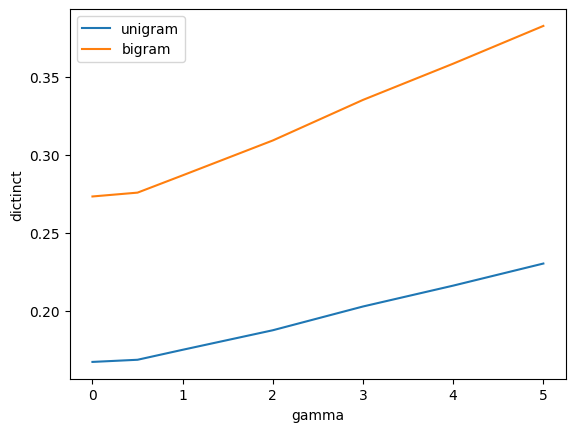

In [119]:
import matplotlib.pyplot as plt

# 定义 x 和 y 坐标

plt.xlabel("gamma")
plt.ylabel('dictinct')

# 绘制折线图
plt.plot(range_list, distinct_1, label='unigram')
plt.plot(range_list, distinct_2, label='bigram')

plt.legend()

# 显示图表
plt.show()
